In [1]:
import glob
import h5py
import pickle
import numpy as np
from datetime import datetime
from cfod import catalog
catalog = catalog.as_dataframe()

# Load data from waterfall files
base_path = '/mnt/c/Users/findm/Desktop/surf2023/waterfall_data/data/'
filepaths = glob.glob(base_path+'*.h5')
tns_names = [fp.split('/')[-1].split('_')[0] for fp in filepaths]

In [2]:
# put all (frb['frb']['plot_time'], frb['frb']['model_ts']) into a numpy array
# plot_time is the time axis
# model_ts is the intensity axis
# unique plot_time for each file

series = []
for f in filepaths:
    frb = h5py.File(f,'r')
    series.append([f[:12],np.array([frb['frb']['plot_time'], frb['frb']['ts']])])
    

In [4]:
# for each series, shift time axis to be zeroed at max intensity
print(len(series))
for s in series:
    s[1][0] = s[1][0] - s[1][0][np.argmax(s[1][1])]
    # normalize intensity axis
    s[1][1] = s[1][1]/np.max(s[1][1])
    
# put all series onto a common time axis, zero padding where necessary

# find max and min time values
max_time = np.max([np.max(s[1][0]) for s in series])
min_time = np.min([np.min(s[1][0]) for s in series])

# create common time axis
time_axis = np.arange(min_time,max_time,0.05)

# create empty array to hold all series
series_array = np.zeros((len(series),len(time_axis)))

# for each series, interpolate onto common time axis
for i in range(len(series)):
    series_array[i] = np.interp(time_axis,series[i][1][0],series[i][1][1],left=0,right=0)

535


In [5]:
# pickle series_array
import pickle
pickle.dump(series_array,open('chime_frb_535_interpolated_ts.pkl','wb'))

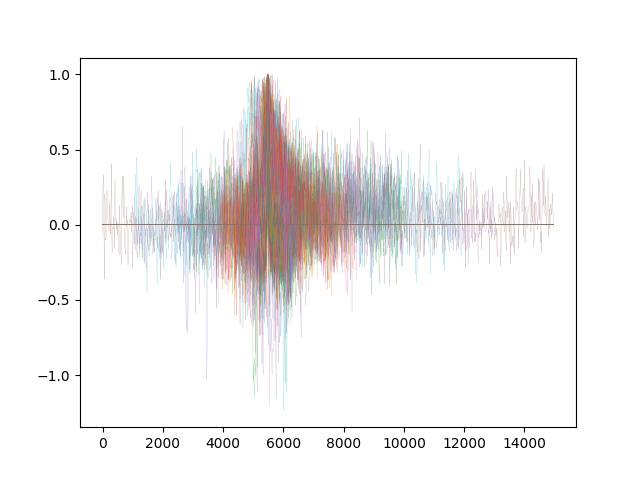

In [6]:
# plot all series on one graph
import matplotlib.pyplot as plt
%matplotlib widget
for i in range(len(series_array)):
    plt.plot(series_array[i],linewidth=0.1)
plt.show()
    

In [1]:
import pickle
chime_frb_529_interpolated_ts = pickle.load(open('chime_frb_529_interpolated_ts.pkl','rb'))
import umap
import umap.plot as uplot
import numpy as np
%matplotlib inline

/home/guutz/radioconda/envs/umap/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/guutz/radioconda/envs/umap/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/guutz/radioconda/envs/umap/lib/python3.9/site-packages/umap/distances.

UMAP( verbose=True)
Mon Jul  3 17:57:08 2023 Construct fuzzy simplicial set
Mon Jul  3 17:57:09 2023 Finding Nearest Neighbors
Mon Jul  3 17:57:09 2023 Finished Nearest Neighbor Search
Mon Jul  3 17:57:09 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Mon Jul  3 17:57:13 2023 Finished embedding


<Axes: >

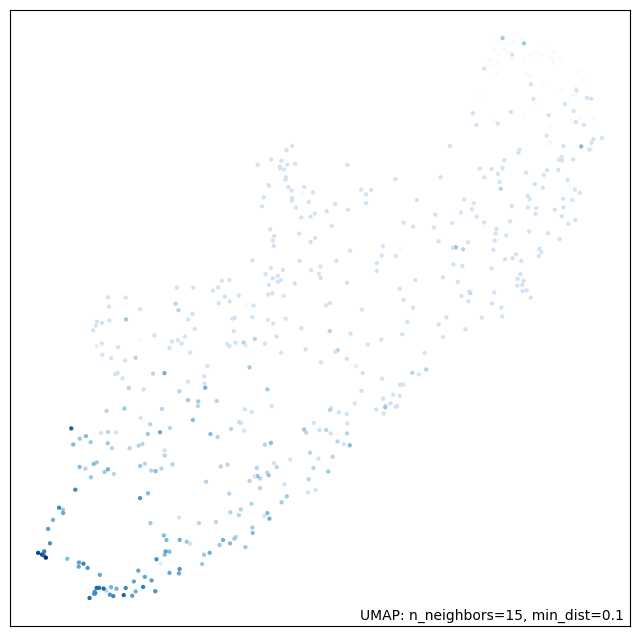

In [61]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean',verbose=True)
embedding = reducer.fit_transform(chime_frb_529_interpolated_ts)
uplot.points(reducer, values=np.array([np.log(len(s[1][1])) for s in series]))